## Theory

Training a very large deep neural network can be painfully slow. Although we can speed up this process by applying a good initialization technique for connected weights, applying a good activation function and applying batch normalization. Another huge boost comes from using a fast optimizers than the regular Gradient Descent optimizer. In this notebook, we will look into the most popular algorithms: momentum optimization, Nesterov Accelerated Gradient, AdaGrad, PMSProp and finally Adam and Nadam optimization.

### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
## Lets first look into the list of optimizers which tensorflow provides real quick

[i for i in dir(tf.keras.optimizers) if not i.startswith("_")]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'schedules',
 'serialize']

### Momentum Optimization

One disadvantage of the SGD method is that its update direction depends entirely on the current batch, so its update is very unstable. A simple way to solve this problem is to introduce momentum. 

Momentum is momentum, which simulates the inertia of an object when it is moving, that is, the direction of the previous update is retained to a certain extent during the update, while the current update gradient is used to fine-tune the final update direction. In this way, you can increase the stability to a certain extent, so that you can learn faster, and also have the ability to get rid of local optimization.

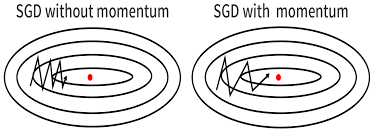

### Momentum algorithm - 
 
$1.\ \textbf{m} \leftarrow \beta \textbf{m} + \eta \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$
 
$2.\ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \textbf{m}$

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient (NAG)

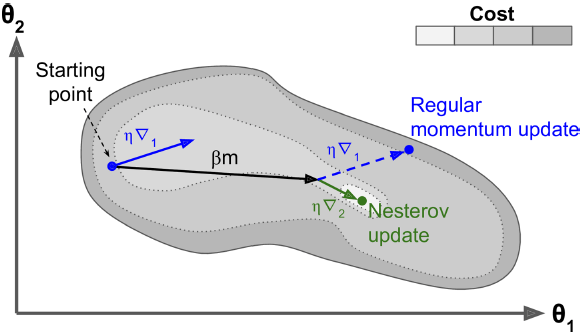

### NAG algorithm -

 
$1.\ \textbf{m} \leftarrow \beta \textbf{m} + \eta \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta} - \beta \textbf{m})$
 
$2.\ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \textbf{m}$

In [ ]:
optimizer2 = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

Adagrad is an algorithm for gradient-based optimization which adapts the learning rate to the parameters, using low learning rates for parameters associated with frequently occurring features, and using high learning rates for parameters associated with infrequent features. 

So, it is well-suited for dealing with sparse data.

But the same update rate may not be suitable for all parameters. For example, some parameters may have reached the stage where only fine-tuning is needed, but some parameters need to be adjusted a lot due to the small number of corresponding samples.

Adagrad proposed this problem, an algorithm that adaptively assigns different learning rates to various parameters among them. The implication is that for each parameter, as its total distance updated increases, its learning rate also slows.

>**GloVe word embedding uses adagrad where infrequent words required a greater update and frequent words require smaller updates.**

>**Adagrad eliminates the need to manually tune the learning rate.**



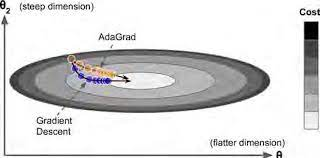

### AdaGrad algorithm 

1. $ \textbf{s} \leftarrow  \textbf{s} +  \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) \otimes  \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$

2. $ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta}- \eta \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})   \oslash \sqrt{\textbf{s} + \epsilon}$

In [ ]:
optimizer3 = tf.keras.optimizers.Adagrad(lr=0.001)

### RMSProp

The full form of RMSProp algorithm is **Root Mean Square Prop**, which is an adaptive learning rate optimization algorithm proposed by Geoff Hinton.
AdaGrad runs the risk of slowing down a bit too fast and never converging to the global minimum. The RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations (as opposed to all the gradients from the very beginning). It does this so by using exponential decay in the first step. The decay rate $\beta$ is yet another hyperparameter which is typically set to 0.9. This default value often works very well, so you may not need to tune it at all.

RMSProp almost always performs much better than AdaGrad. It was the preffered optimizer until Adam optimization came around.

The gist of RMSprop is to:

1. Maintain a moving (discounted) average of the square of gradients
2. Divide the gradient by the root of this average

This implementation of RMSprop uses plain momentum, not Nesterov momentum.

### RMSProp Algorithm 

1. $  \textbf{s} \leftarrow  \beta \textbf{s} +  (1 - \beta)\triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) \otimes  \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$

2. $ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta}- \eta \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})   \oslash \sqrt{\textbf{s} + \epsilon}$

In [ ]:
optimizer4 = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9) 

### Adam

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

**Adaptive Moment Estimation (Adam)** is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like Adadelta and RMSprop.

>Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

>Adam can be viewed as a combination of Adagrad and RMSprop,(Adagrad) which works well on sparse gradients and (RMSProp) which works well in online and nonstationary settings repectively.

>Adam implements the **exponential moving average of the gradients** to scale the learning rate instead of a simple average as in Adagrad. It keeps an exponentially decaying average of past gradients.

>Adam is computationally efficient and has very less memory requirement.

>Adam optimizer is one of the most popular and famous gradient descent optimization algorithms.

### Adam algorithm

1. $\textbf{m} \leftarrow \beta_1 \textbf{m} + (1 - \beta_1)\triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$

2. $\textbf{s} \leftarrow  \beta_2 \textbf{s} +  (1 - \beta_2)\triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) \otimes  \triangledown_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$

3. $\hat{\textbf{m}} \leftarrow \frac{\textbf{m}}{1 - \beta_1^t}$

4. $\hat{\textbf{s}} \leftarrow \frac{\textbf{s}}{1 - \beta_2^t}$

5. $ \boldsymbol{\theta} \leftarrow \boldsymbol{\theta}- \eta \hat{\textbf{m}}  \oslash \sqrt{\hat{\textbf{s}} + \epsilon}$

In [ ]:
optimizer5 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

### Adamax Optimization

Adamax is sometimes superior to Adam, specially in models with embeddings.

In [ ]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

### Nadam Optimization

Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## How to choose optimizers?

- If the data is sparse, use the self-applicable methods, namely Adagrad, Adadelta, RMSprop, Adam.

- RMSprop, Adadelta, Adam have similar effects in many cases.

- Adam just added bias-correction and momentum on the basis of RMSprop,

- As the gradient becomes sparse, Adam will perform better than RMSprop.

**Overall, Adam is the best choice.**

>SGD is used in many papers, without momentum, etc. Although SGD can reach a minimum value, it takes longer than other algorithms and may be trapped in the saddle point.

- If faster convergence is needed, or deeper and more complex neural networks are trained, an adaptive algorithm is needed.

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/optimizers.gif">

**Let's train a neural network on Fashion MNIST using the Leaky ReLU:**

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")]


model = tf.keras.models.Sequential(LAYERS)

In [7]:
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 6s - loss: 0.4952 - accuracy: 0.8202 - val_loss: 0.3715 - val_accuracy: 0.8704
Epoch 2/10
1719/1719 - 6s - loss: 0.3837 - accuracy: 0.8602 - val_loss: 0.4085 - val_accuracy: 0.8620
Epoch 3/10
1719/1719 - 7s - loss: 0.3542 - accuracy: 0.8691 - val_loss: 0.3422 - val_accuracy: 0.8814
Epoch 4/10
1719/1719 - 6s - loss: 0.3330 - accuracy: 0.8773 - val_loss: 0.3318 - val_accuracy: 0.8794
Epoch 5/10
1719/1719 - 7s - loss: 0.3166 - accuracy: 0.8831 - val_loss: 0.3151 - val_accuracy: 0.8836
Epoch 6/10
1719/1719 - 7s - loss: 0.3042 - accuracy: 0.8887 - val_loss: 0.3426 - val_accuracy: 0.8770
Epoch 7/10
1719/1719 - 7s - loss: 0.2942 - accuracy: 0.8909 - val_loss: 0.3321 - val_accuracy: 0.8848
Epoch 8/10
1719/1719 - 6s - loss: 0.2840 - accuracy: 0.8941 - val_loss: 0.3556 - val_accuracy: 0.8778
Epoch 9/10
1719/1719 - 6s - loss: 0.2754 - accuracy: 0.8962 - val_loss: 0.3573 - val_accuracy: 0.8830
Epoch 10/10
1719/1719 - 7s - loss: 0.2660 - accuracy: 0.9006 - val_loss: 0.3375 - 